source: https://seaborn.pydata.org/tutorial/relational.html

# Visualizing Statistical Relationships

Statistical relationship is a process of understanding how variables in a dataset related each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the humn visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
* relplot()
* scatterplot()
* lineplot()

### 2. Categorical Data Plot
* catplot()
* boxplot()
* stripplot()
* swamplot()
* etc ...

### 3. Visualizing Distribution of the Data
* distplot()
* kdeplot()
* jointplot()
* rugplot()

### 4. Linear Regression 
* regplot()
* lmplot()

### 5. Controlling Ploted Figure Aesthetics
* figure styling
* axes styling
* color palette
* etc ...

# 1. Numerical Data Ploting

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is **relplot()**. This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

* **scatterplot()** (with kind="scatter"; the default)

* **lineplot()** (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

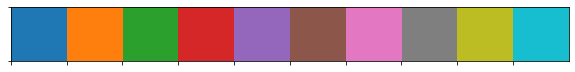

In [2]:
sns.palplot(sns.color_palette())

* python 문장 도중에 shift_tab+tab+tab 하면 도움말 창 나타남

<img style="float: left;" src="pic/fig_13.png" width="700">

In [3]:
sns.set(style='darkgrid')

## Relating variables with scatter plots

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [4]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips["headcount"]=tips['size']
tips=tips.drop(["size"],axis=1)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,headcount
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,headcount
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


total_bill 과 tip의 관계

문법을 모르면 shift+tab 이용하자

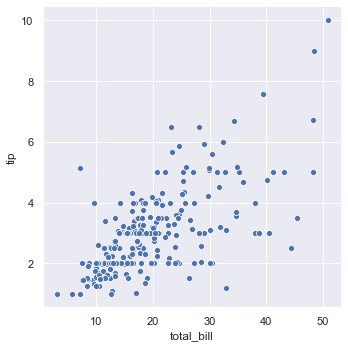

In [8]:
sns.relplot(x='total_bill', y='tip', data=tips)

In [9]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

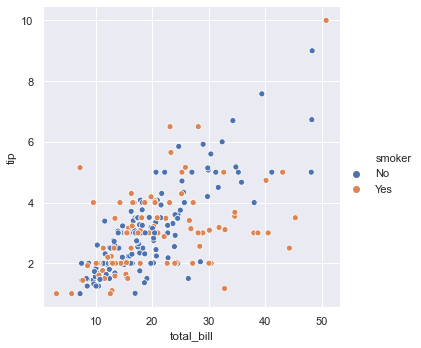

In [10]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

In [11]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

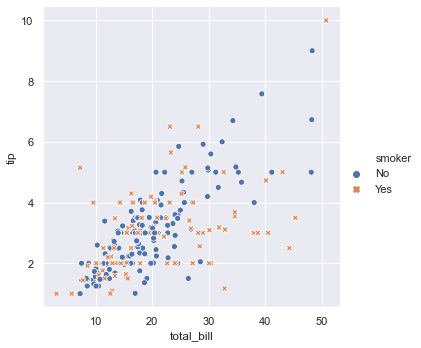

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

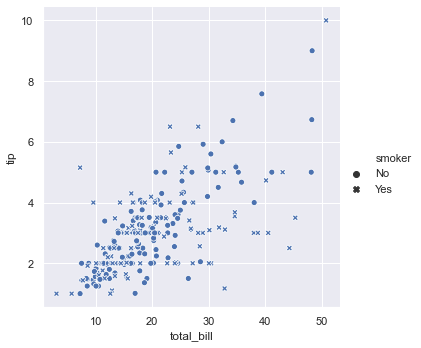

In [13]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

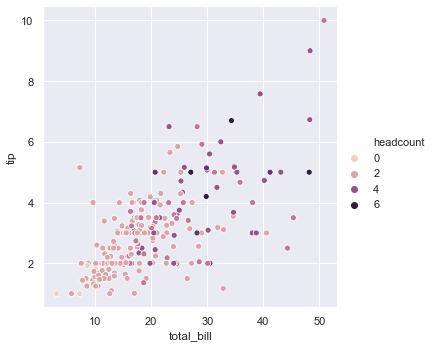

In [14]:
sns.relplot(x='total_bill', y='tip', hue='headcount', data=tips)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to **cubehelix_palette()**:

* Let's change colors.

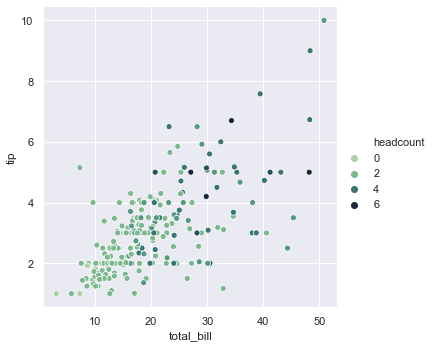

In [15]:
sns.relplot(x='total_bill', y='tip', hue='headcount', palette = 'ch:r=-0.5,l=0.75', data=tips)

The third kind of semantic variable changes the size of each point:

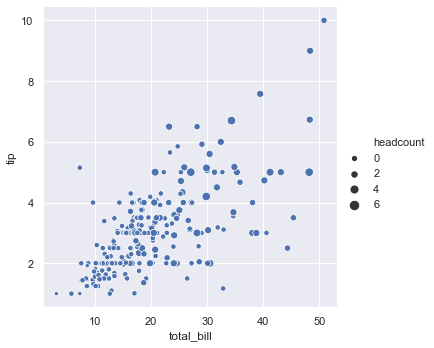

In [16]:
sns.relplot(x='total_bill', y='tip', size='headcount', data=tips)

hue, style, size의 차이: hue: color 변화,  style: 모양변화, size: 크기변화 

Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

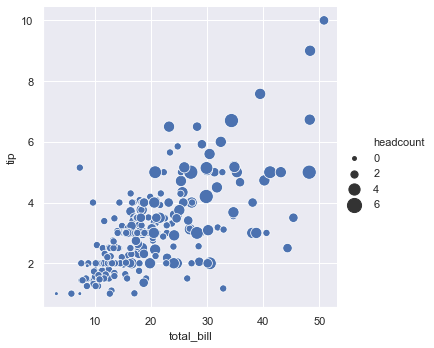

In [17]:
sns.relplot(x='total_bill', y='tip', size='headcount', sizes=(15,200), data=tips)

More examples for customizing how the different semantics are used to show statistical relationships are shown in the scatterplot() API examples.



## Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the **lineplot()** function, either directly or with relplot() by setting kind="line":

In [18]:
from numpy.random import randn

In [19]:
df=pd.DataFrame(dict(time=np.arange(500), value=randn(500).cumsum()))

In [20]:
df=pd.DataFrame({'time':np.arange(500), 'value':randn(500).cumsum()})

In [21]:
df.head()

,time,value
0,0,-1.927163
1,1,-2.572768
2,2,-2.017923
3,3,-0.936849
4,4,-1.968056


sns.relplot()에서 kind 옵션의 기본 값은 'scatter'

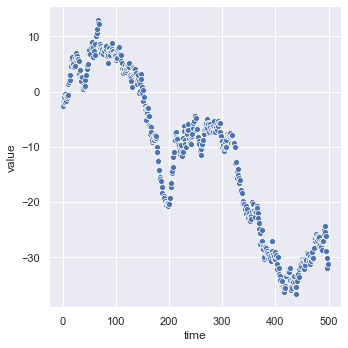

In [22]:
sns.relplot(x='time', y='value', kind='scatter', data=df)

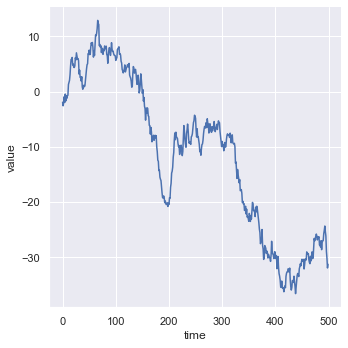

In [23]:
sns.relplot(x='time', y='value', kind='line', data=df)

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

kind='line' 을 사용하는 경우, 기본적으로 x축은 sort 한 후 그림을 그린다.  
문제가 되는 예제를 만들어 보자. 

In [24]:
df=pd.DataFrame(randn(500,2).cumsum(axis=0), columns=['time','value'])
df.head()

,time,value
0,0.821386,-0.704916
1,0.667390,-0.055655
2,1.201440,-0.378832
3,1.939752,-0.372807
4,2.741702,-1.563609


In [25]:
df.describe()

,time,value
count,500.000000,500.000000
mean,6.377769,-2.355789
std,9.397864,4.918366
min,-14.065346,-15.562692
25%,-1.904308,-5.015157
50%,7.873950,-2.061097
75%,13.892300,0.900899
max,26.507703,7.337823


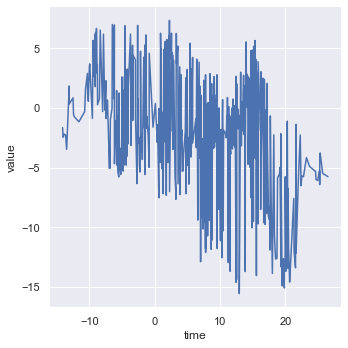

In [26]:
sns.relplot(x='time', y='value', kind='line', data=df)

만일 sort=False로 주면,

In [27]:
sns.relplot(x='time', y='value', kind='line', sort=False, edata=df)

ValueError: Could not interpret input 'time'

## Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the **multiple measurements** at each x value by plotting the mean and the 95% confidence interval around the mean:

In [28]:
fmri=sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [29]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


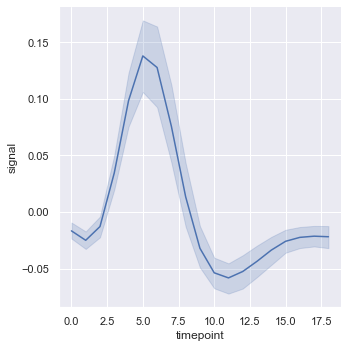

In [30]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

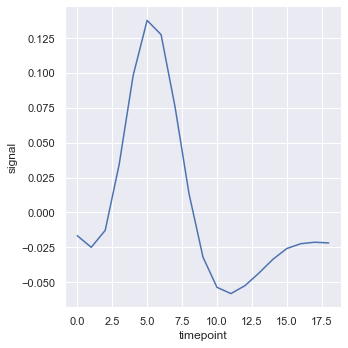

In [31]:
sns.relplot(x='timepoint', y='signal', kind='line', ci=None, data=fmri)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

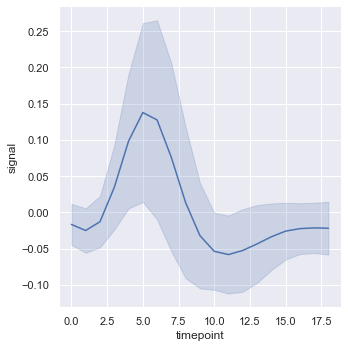

In [32]:
sns.relplot(x='timepoint', y='signal', kind='line', ci='sd', data=fmri)

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

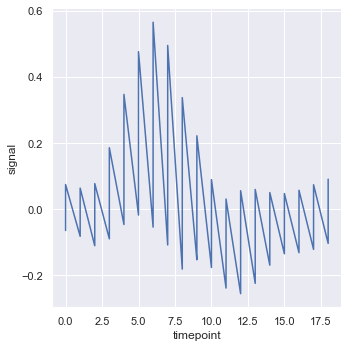

In [33]:
sns.relplot(x='timepoint', y='signal', estimator=None, kind='line', data=fmri)

## Plotting subsets of data with semantic mappings

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

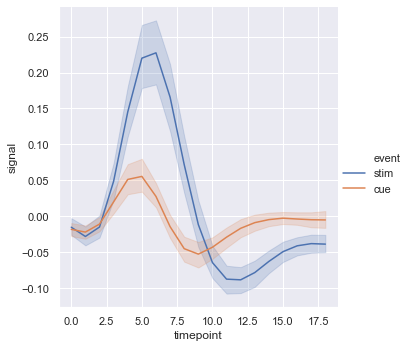

In [34]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

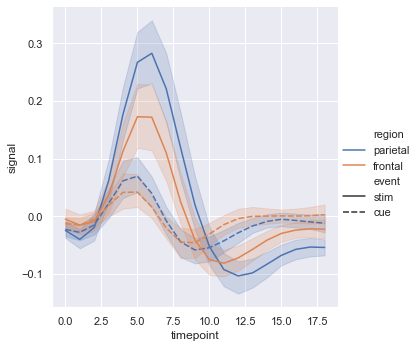

In [35]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', kind='line', data=fmri)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

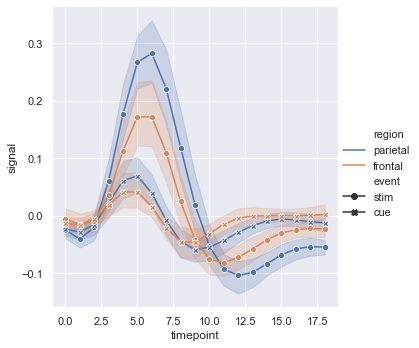

In [36]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', 
            dashes=False, markers=True, kind='line', data=fmri)

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

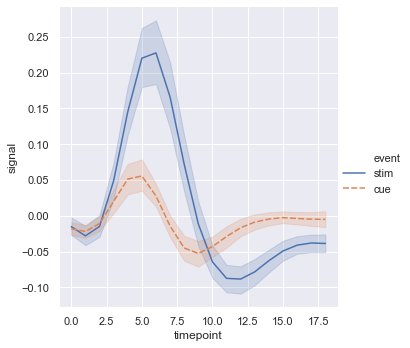

In [37]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

In [38]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


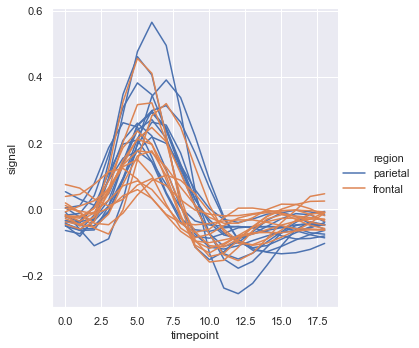

In [39]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))

The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

In [40]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


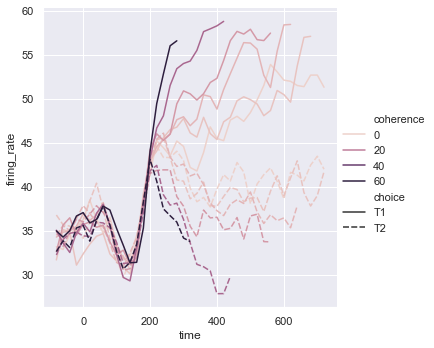

In [41]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

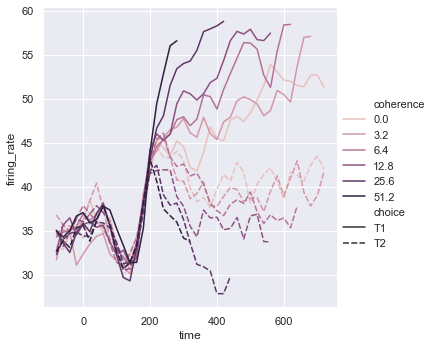

In [42]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots)

The third semantic, size, changes the width of the lines:

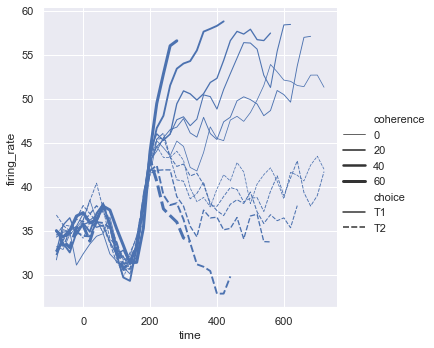

In [43]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots)

While the size variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

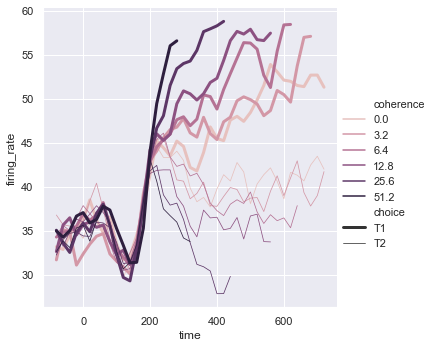

In [44]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

## Plotting with date data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

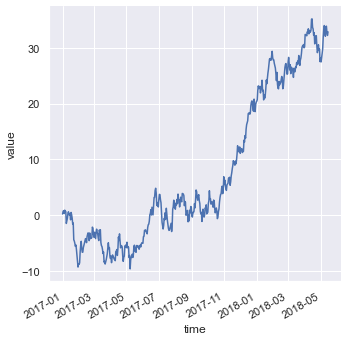

In [45]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so.   
But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

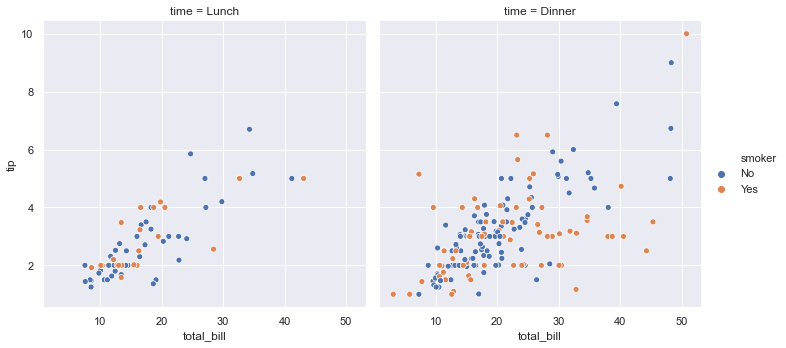

In [46]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips)

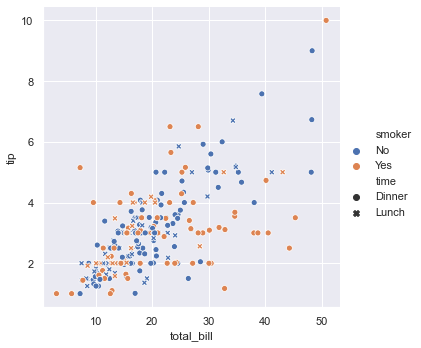

In [47]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            style="time", data=tips)

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

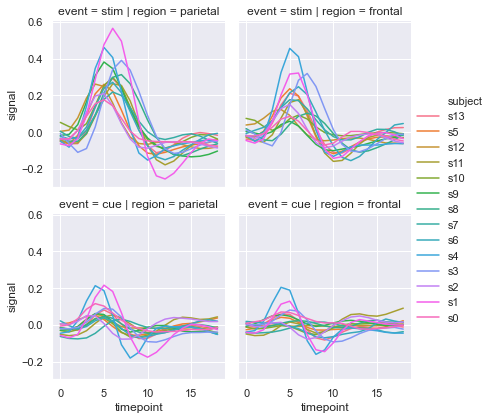

In [48]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

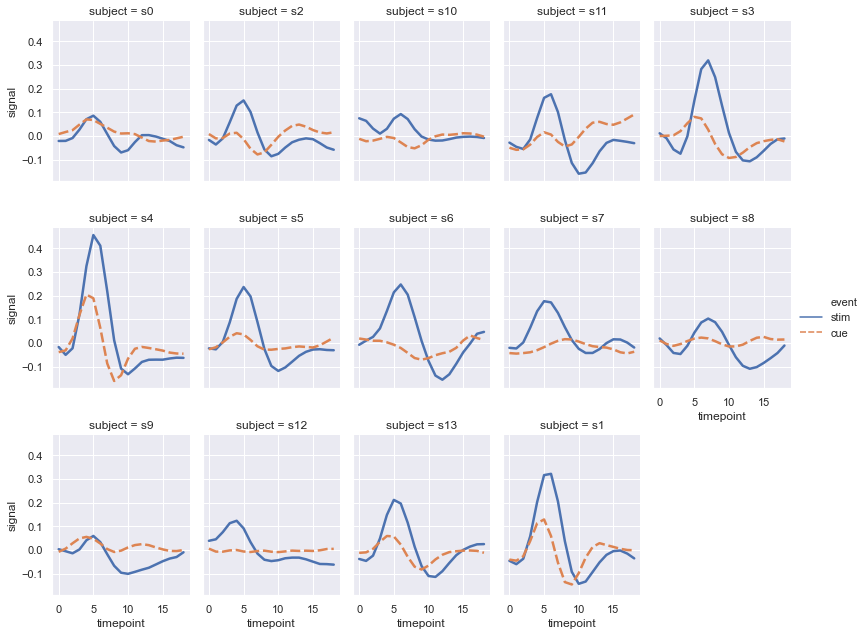

In [49]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

These visualizations, which are often called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by scatterplot() and relplot(), always try to keep in mind that several simple plots are usually more effective than one complex plot.

## relplot()과 scatterplot()

* scatterplot() 은 relplot(kind='scatter') 과 동일하며, kind='scatter'는 기본 값이므로, kind 파라메터가 없는 replot()과 동일하다. 

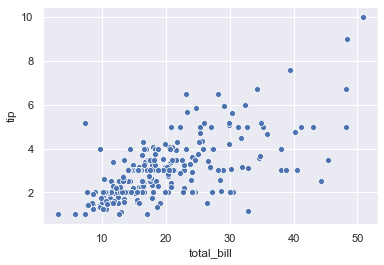

In [50]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

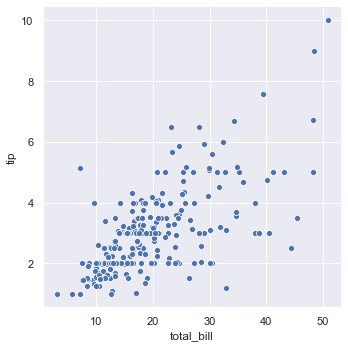

In [51]:
sns.relplot(x='total_bill', y='tip', data=tips)

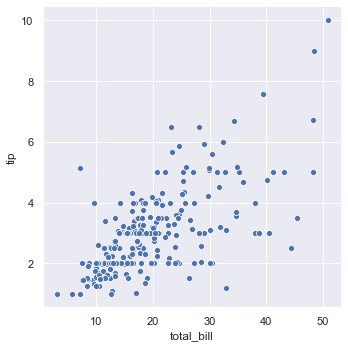

In [52]:
sns.relplot(x='total_bill', y='tip', kind='scatter', data=tips)

## lineplot()과 relplot()

* lineplot() 은 relplot(kind='line') 과 동일하다. 

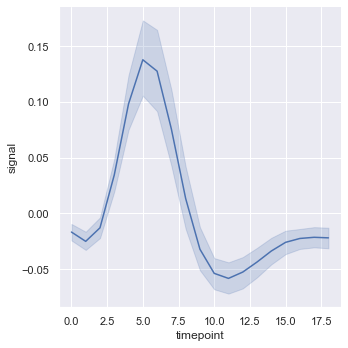

In [53]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

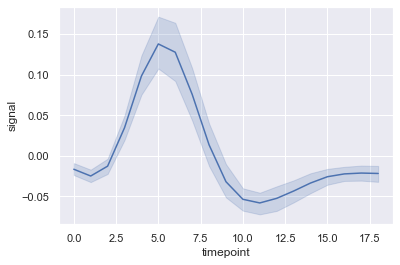

In [54]:
sns.lineplot(x='timepoint', y='signal',  data=fmri)